In [7]:
#This cell reads the cyst masks for histology generated using the SAM workflow and extracts parameters
#from them. The parameters are saved in a csv file in the results folder. 

origImFolder  = 'E:/AAV para enfermedades renales/Histologia/Series 2/Cuts series 2'
resultsFolder = 'E:/AAV para enfermedades renales/Histologia/Series 2/ResultsCystDataRemovedLiver'

from IPython.core.inputtransformer2 import EscapedCommand
from glob import glob as glob
import tifffile as tif
import numpy as np
import pandas as pd
import cv2
from matplotlib.image import imread
import matplotlib.pyplot as plt

from skimage.measure import regionprops_table
import os
import time


t0 = time.perf_counter()

counter=-1
#For each of the masks in that specific folder
for kidneyName in glob(origImFolder + '/*')[14:]:

  os.chdir(kidneyName)

  for maskName in glob('liverRemoved/cystMasks/cystsMask*.tif'):

    counter+=1
    t1 = time.perf_counter()

    print(maskName)
    mask = tif.imread(maskName)


    #origImName = 'PKD2'+(maskName.split('PKD2')[1].split('-mask')[0])+'.tif'
    origImName = maskName.split('cystsMask-')[1]
   

    im = tif.imread(origImName)
    #Grayscale version of the original RGB image
    origIm = np.mean(im,2,dtype=np.uint8)
 
    data = regionprops_table(mask, origIm, properties=('label','area','centroid','axis_minor_length','axis_major_length',\
                                                        'eccentricity','intensity_mean'))

    dataTable = pd.DataFrame(data)

    dataTable.to_csv(resultsFolder+'/'+os.path.basename(maskName).split('.tif')[0]+'.csv')

    print(mask.shape)
    print(origIm.shape)
    #print(dataTable)
    t2 = time.perf_counter()
    stepTime = t2-t1
    print(stepTime,' s\n')

    t2=t1

    print('counter: ',counter)

    mask = None

totTime = t2-t0
print('Total time: ',totTime,' s')

liverRemoved/cystMasks\cystsMask-PKD2-45-1.svs - Series 2.tif
(9992, 8550)
(9992, 8550)
7.033227899999986  s

counter:  0
liverRemoved/cystMasks\cystsMask-PKD2-45-10.svs - Series 2.tif
(9685, 8100)
(9685, 8100)
12.996531599999969  s

counter:  1
liverRemoved/cystMasks\cystsMask-PKD2-45-2.svs - Series 2.tif
(9233, 8999)
(9233, 8999)
7.5926853999999935  s

counter:  2
liverRemoved/cystMasks\cystsMask-PKD2-45-3.svs - Series 2.tif
(9683, 9450)
(9683, 9450)
7.804502599999978  s

counter:  3
liverRemoved/cystMasks\cystsMask-PKD2-45-4.svs - Series 2.tif
(10157, 8100)
(10157, 8100)
12.121739100000013  s

counter:  4
liverRemoved/cystMasks\cystsMask-PKD2-45-5.svs - Series 2.tif
(9337, 7649)
(9337, 7649)
43.54976019999998  s

counter:  5
liverRemoved/cystMasks\cystsMask-PKD2-45-6.svs - Series 2.tif
(9296, 7649)
(9296, 7649)
40.5767194  s

counter:  6
liverRemoved/cystMasks\cystsMask-PKD2-45-7.svs - Series 2.tif
(9911, 8100)
(9911, 8100)
6.999808500000029  s

counter:  7
liverRemoved/cystMasks\cy

In [9]:
#This cell reads the full kidney masks and extracts the total area, storing it in a .csv file.

origImFolder  = 'E:/AAV para enfermedades renales/Histologia/Series 2/Cuts series 2'
resultsFolder = 'E:/AAV para enfermedades renales/Histologia/Series 2/ResultsCystDataRemovedLiver'


import tifffile as tif
import os
import numpy as np
import pandas as pd
from glob import glob

areas = []
names = []
counter=-1

data = {}
#For each of the masks in that specific folder
for kidneyName in glob(origImFolder + '/*'):
    kidneyRawName = os.path.basename(kidneyName)
    os.chdir(kidneyName+'/liverRemoved/kidneyMasks')
    for kidneyMaskName in glob('kidneyMask-*.tif'):

        counter+=1
        # Read the mask
        mask = tif.imread(kidneyMaskName)
        # Compute the area of the mask
        area = np.count_nonzero(mask)
        # Append the area to the list of areas
        areas.append(area)
        names.append(kidneyMaskName)
        
data = {'kidneyMaskName':names,'area':areas}

kidneyAreasDf = pd.DataFrame(data)
kidneyAreasDf.to_csv(resultsFolder+'/'+'0-kidneyAreas.csv')


anovaResTotAreaMean:  1.0300922000086172e-07
anovaTotAreaTempResults:  [0.06797670114664094, 0.4391983646684804, 0.0038380104009439883, 0.013661156341869702]
anovaResTotAreaMeanPath_Contr_3:  0.00030505700654671864


anovaResMeanAreaMean:  0.44634520191976657
anovaMeanAreaTempResults:  [0.45020219516672394, 0.16999603233909402, 0.7810543834405422, 0.16327532003612874]
anovaResTotAreaMeanPath_Contr_3:  0.6040409185755126


anovaResEccentMean:  0.31810270410558666
anovaEccentTempResults:  [0.16512326870853167, 0.45801698308168026, 0.9362512844871411, 0.07992023419543781]
anovaResEccentMeanPath_Contr_3:  0.0017734581425010287


anovaResIntMean:  3.3898185084547196e-05
anovaIntTempResults:  [0.3200598492344797, 0.9351816020127458, 1.8143347907741533e-10, 8.318534515083468e-09]
anovaResIntPath_Contr_3:  0.0014924841709523268


anovaResNumCysts:  5.9388405360127706e-08
anovaNumCystsTempResults:  [0.705569904744994, 0.24793800009898045, 0.0015902465963161991, 0.06698847737755066]
anovaResNumC

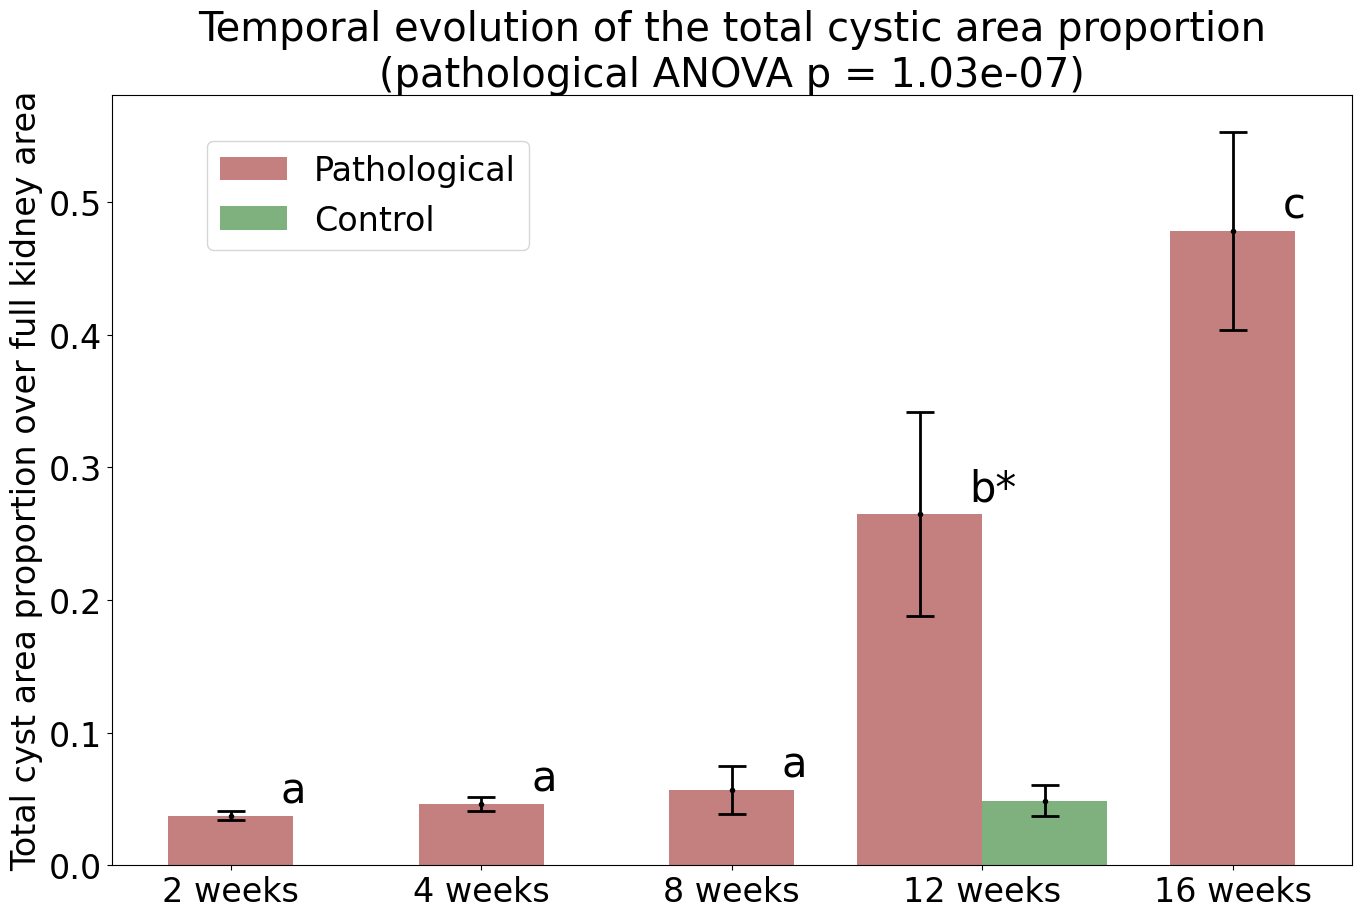

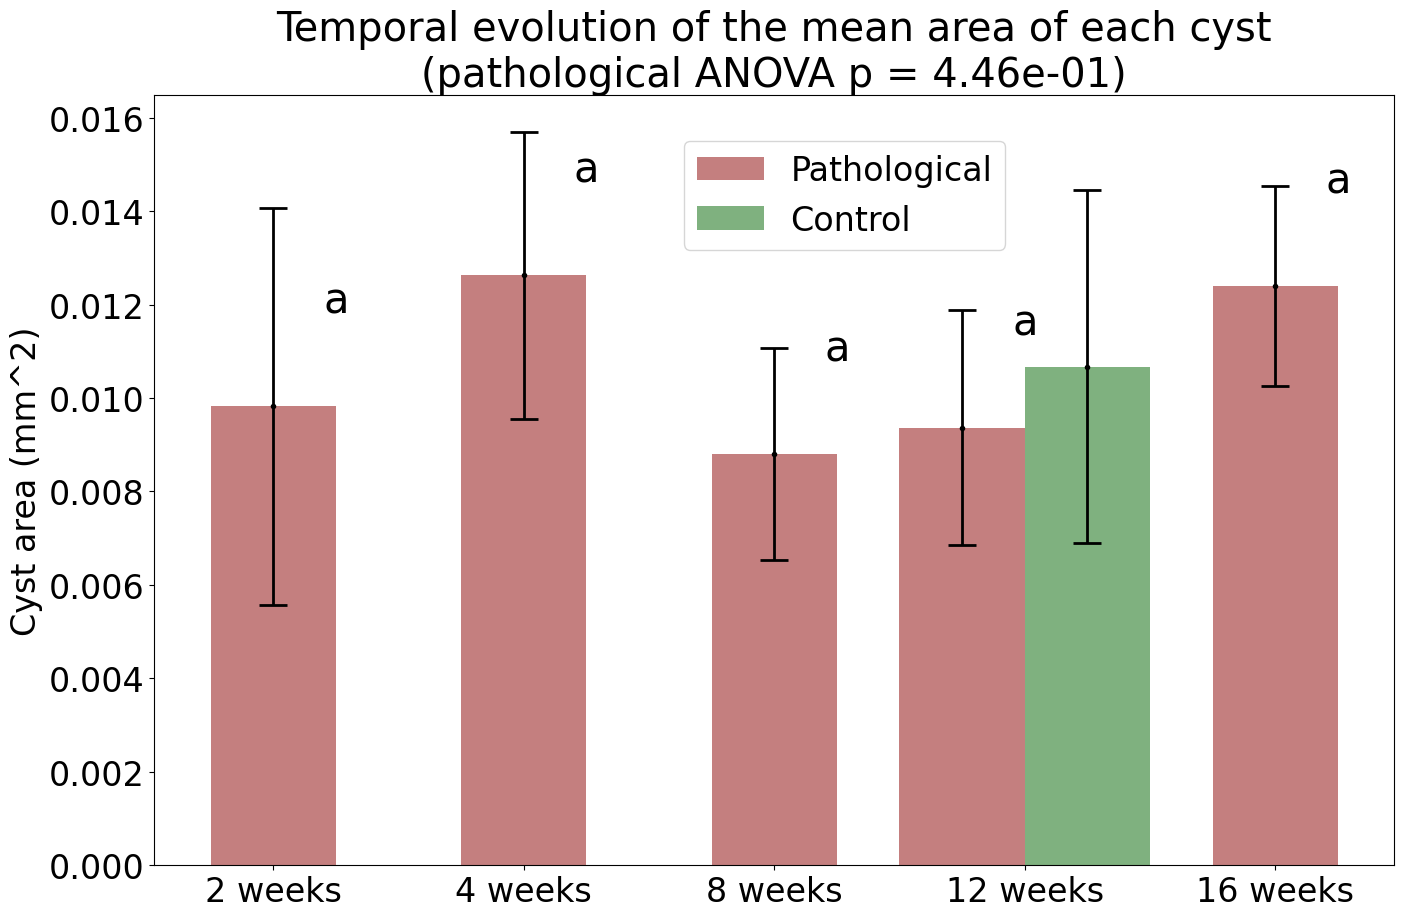

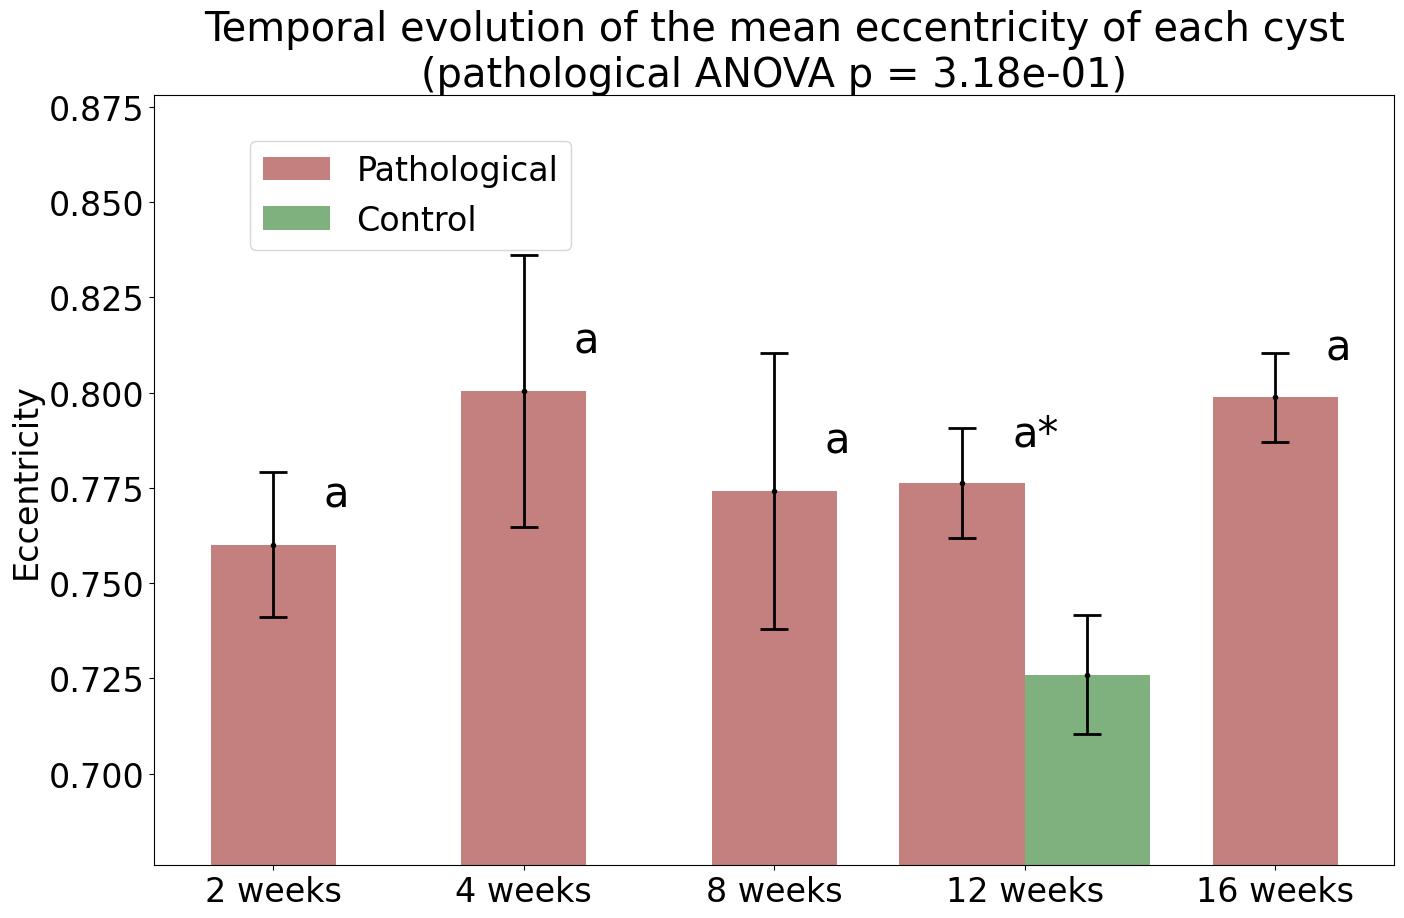

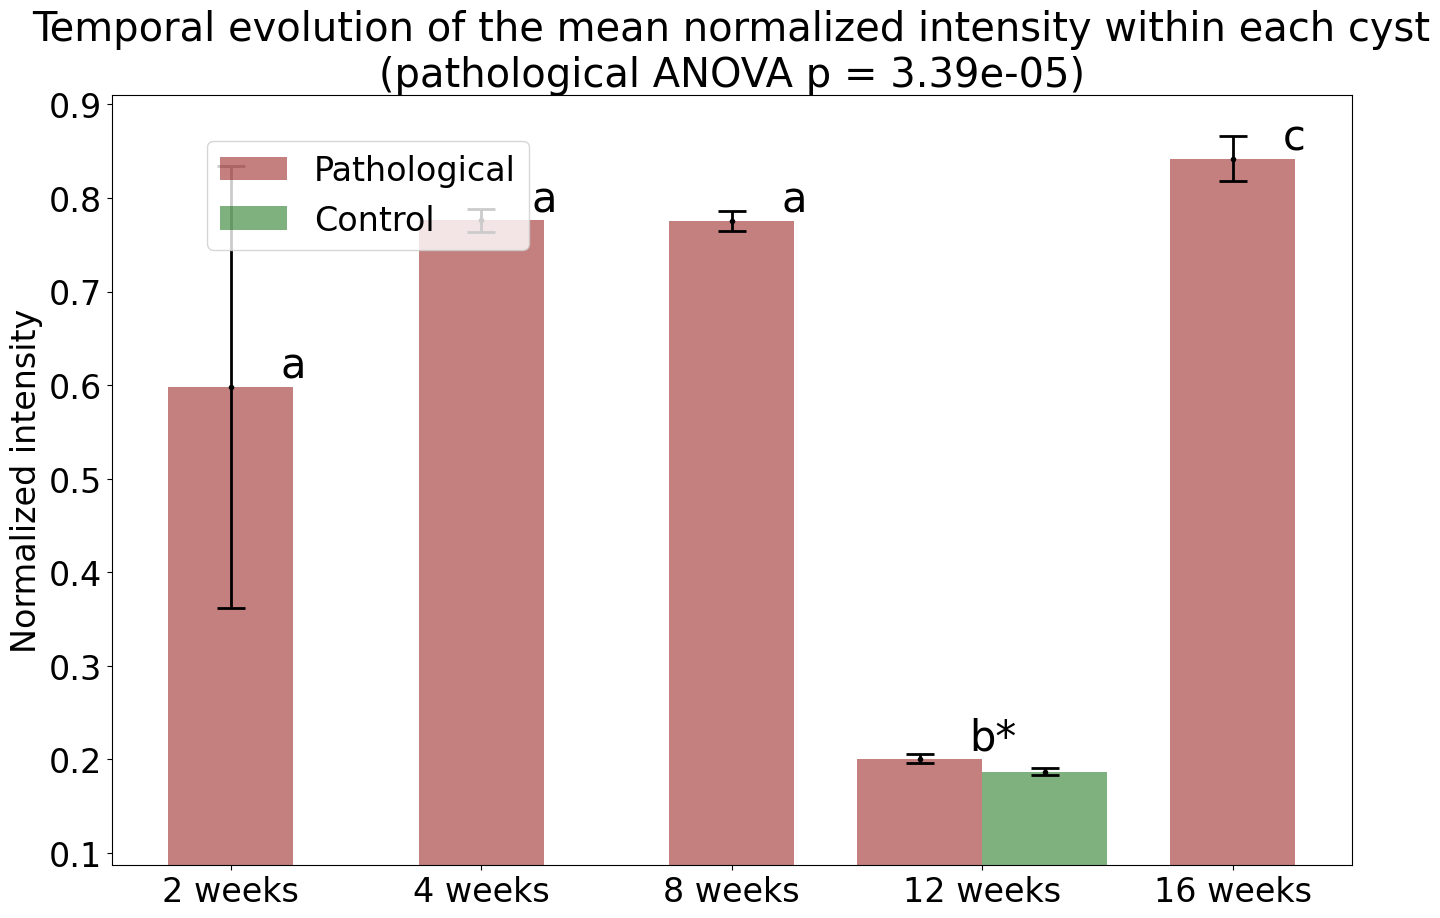

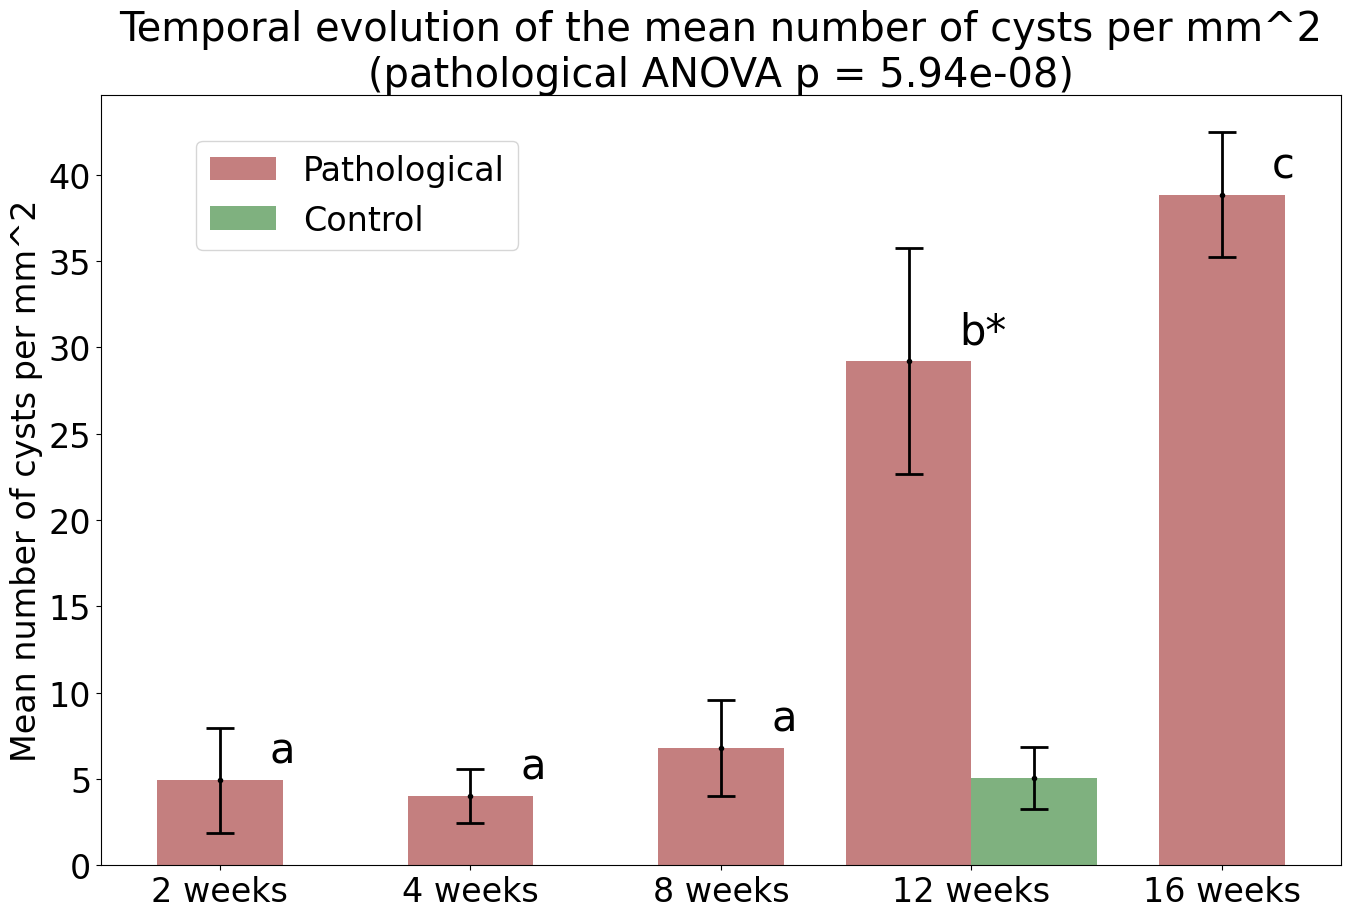

In [19]:
#Plot all the data (using already calculated kidney masks)


dataFolder = 'E:/AAV para enfermedades renales/Histologia/Series 2/ResultsCystDataRemovedLiver'
imagesFolder = 'E:/AAV para enfermedades renales/Histologia/Series 2/Cuts series 2'
resultsFolder = 'E:/AAV para enfermedades renales/Histologia/Series 2/csvAnalysisRemovedLiver'
fullKidneyMaskName = 'E:/AAV para enfermedades renales/Histologia/Series 2/ResultsCystDataRemovedLiver/0-kidneyAreas.csv'
figuresFolder = 'E:/AAV para enfermedades renales/Publications/SAM Histology/Images'

#Pixel size for histology images, series 1: 0.502 um/pixel side = 0.252 um^2/pixel

#Series 1 is 16 times larger in area than series 2 (4 times larger in each side). Thus,
#the pixel size for series 2 is 0.252*16 = 4.032 um^2/pixel

#pixelSize in um^2
pixSize = 4.032

import warnings
import numpy as np
import tifffile as tif
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import copy

if not os.path.exists(resultsFolder):
    os.makedirs(resultsFolder)

plt.rc('font', size=24) 
figSiz=[16,10]

experiments= {}
#Identifying all pathological and control mice at different time points.
#Each specimen is identified by a number, which corresponded to a specific time point.

experiments['path2weeks'] = np.array([7,11,16,17])
experiments['path4weeks'] = np.array([10,20,31])
experiments['path8weeks'] = np.array([22,23,27,28])
experiments['path12weeks'] = np.array([45,70,73,76])
experiments['path16weeks'] = np.array([32,35,38,40])
experiments['health12weeks'] = np.array([54,59,60,63,64,66])


warnings.filterwarnings("ignore")

totAreaMeanListForPlot = list()
meanAreaMeanListForPlot = list()
eccentricityMeanListForPlot = list()
intensity_meanMeanListForPlot = list()
numCystsPerAreaMeanListForPlot = list()  

initialNamesForPlot = list()

#Read the full kidney mask areas
kidneyAreasDf = pd.read_csv(fullKidneyMaskName)

for exp in experiments.keys():
    expData = {}
    for num in experiments[exp]:

        nameStr = '{}/cystsMask-PKD2-{}-*.csv'.format(dataFolder,num)
        csvAnalysisName = '{}/csvAnalysis-{}.csv'.format(resultsFolder,num)

        with open(csvAnalysisName, 'w', newline='') as file:

            filesList = glob(nameStr)

            #Variable to store the total area proportion covered by cysts in each cut
            totAreas = np.zeros(len(filesList))

            #Variable to store the number of cysts per area (per pixel)  
            numCystsPerArea = np.zeros(len(filesList))                             

            for count,fileName in enumerate(filesList):
                
                ############
                #Name of the corresponding row from the kidneys mask
                #totKidneyName = fileName.split('.svs')[0].split('newCorrected-')[1]+'-fullKidneyMask.tif'
                totKidneyName = 'kidneyMask-'+fileName.split('cystsMask-')[1].split('.csv')[0]+'.tif'

                totKidneyArea = kidneyAreasDf[kidneyAreasDf['kidneyMaskName']==totKidneyName]['area']
                
                newData = pd.read_csv(fileName)
                #Store the total area covered by cysts in each cut (as a proportion of the full kidney area)
                totAreas[count] = sum(newData['area'])/totKidneyArea

                #Store the number of cysts per area (per pixel, actually)
                numCystsPerArea[count] = len(newData['area'])/totKidneyArea                                                                                                                                                                                                                     

                #For the first cut
                if count == 0:
                    data = newData
                #The subsequent cuts, combining all data in a single dataframe
                else:
                    data = pd.concat([data,newData],axis = 0)
                    #If it is the last cut found, calculating measures
                    if count == len(filesList)-1:
                        dataMeans = data.mean()
                        dataStd = data.std()
                        totAreasMean = np.mean(totAreas)
                        totAreasStd = np.std(totAreas)

                        numCystsPerAreaMean = np.mean(numCystsPerArea)
                        numCystsPerAreaStd = np.std(numCystsPerArea)    
                        
                        dataMeans = pd.concat([dataMeans,pd.Series({'totAreas':totAreasMean,'numCystsPerArea':numCystsPerAreaMean})])
                        dataStd = pd.concat([dataStd,pd.Series({'totAreas':totAreasStd,'numCystsPerArea':numCystsPerAreaStd })])


        expData[str(num)] = {'dataMeans':dataMeans,'dataStd':dataStd}


    totAreaMeanForPlot = np.zeros(len(expData))     
    meanAreaMeanForPlot = np.zeros(len(expData))
    eccentricityMeanForPlot = np.zeros(len(expData))
    intensity_meanMeanForPlot = np.zeros(len(expData))
    numCystsPerAreaMeanForPlot = np.zeros(len(expData))

    for count,i in enumerate(expData.keys()):
        totAreaMean = expData[i]['dataMeans']['totAreas']
        totAreaMeanForPlot[count] = totAreaMean

        meanAreaMean = expData[i]['dataMeans']['area']
        meanAreaMeanForPlot[count] = meanAreaMean
        
        eccentricityMean = expData[i]['dataMeans']['eccentricity']
        eccentricityMeanForPlot[count] = eccentricityMean

        intensity_meanMean = expData[i]['dataMeans']['intensity_mean']
        intensity_meanMeanForPlot[count] = intensity_meanMean

        numCystsPerAreaMean = expData[i]['dataMeans']['numCystsPerArea']
        numCystsPerAreaMeanForPlot[count] = numCystsPerAreaMean    
        
    totAreaMeanListForPlot.append(totAreaMeanForPlot)
    meanAreaMeanListForPlot.append(meanAreaMeanForPlot)
    eccentricityMeanListForPlot.append(eccentricityMeanForPlot)
    intensity_meanMeanListForPlot.append(intensity_meanMeanForPlot)
    numCystsPerAreaMeanListForPlot.append(numCystsPerAreaMeanForPlot)
    
    initialNamesForPlot.append(exp)


#-------------------------------------------------------------------
#Plotting the data

#Global parameters for plotting
namesForPlot = ['2 weeks','4 weeks','8 weeks','12 weeks','16 weeks']

sideOffset = 0.25
barWidth1 = 0.5
alphaValue = 0.5

#For letters
upOffset = 0.01
rightOffset = 0.2
fontSiz = 20

signifFontSiz = fontSiz + 10

xAxisPoints = np.array([0,1,2,3,4],dtype=float)
modxAxisPoints = copy.deepcopy(xAxisPoints)
modxAxisPoints[3] = modxAxisPoints[3] - sideOffset

#-------------------------------------------------------------------------------------------------
#Perform ANOVA on the totAreaMean
anovaResTotAreaMean = f_oneway(*totAreaMeanListForPlot[:-1])
anovaResTotAreaMean0_1 = f_oneway(*[totAreaMeanListForPlot[0],totAreaMeanListForPlot[1]])
anovaResTotAreaMean1_2 = f_oneway(*[totAreaMeanListForPlot[1],totAreaMeanListForPlot[2]])
anovaResTotAreaMean2_3 = f_oneway(*[totAreaMeanListForPlot[2],totAreaMeanListForPlot[3]])
anovaResTotAreaMean3_4 = f_oneway(*[totAreaMeanListForPlot[3],totAreaMeanListForPlot[4]])

anovaTotAreaTempResults = [anovaResTotAreaMean0_1[1],anovaResTotAreaMean1_2[1],anovaResTotAreaMean2_3[1],anovaResTotAreaMean3_4[1]]

#ANOVA against the control group (at 12 weeks)
anovaResTotAreaMeanPath_Contr_3 = f_oneway(*[totAreaMeanListForPlot[3],totAreaMeanListForPlot[-1]])

print('anovaResTotAreaMean: ',anovaResTotAreaMean[1])
print('anovaTotAreaTempResults: ',anovaTotAreaTempResults)
print('anovaResTotAreaMeanPath_Contr_3: ',anovaResTotAreaMeanPath_Contr_3[1])
print('\n')

#Means and std for each time step, for pathological and control
totAreaPathMeans = [np.mean(i) for i in totAreaMeanListForPlot[:-1]] 
totAreaPathStds = [np.std(i) for i in totAreaMeanListForPlot[:-1]]

totAreaControlMeans = [np.mean(totAreaMeanListForPlot[-1])] 
totAreaControlStds = [np.std(totAreaMeanListForPlot[-1])]

#Plotting 
plt.figure(figsize=figSiz) 

plt.bar(modxAxisPoints,totAreaPathMeans,color='darkred',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(modxAxisPoints,totAreaPathMeans,totAreaPathStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(3+sideOffset,totAreaControlMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(3+sideOffset,totAreaControlMeans,totAreaControlStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

titl = 'Temporal evolution of the total cystic area proportion\n(pathological ANOVA p = {:.2e})'.format(anovaResTotAreaMean[1]) 
plt.title(titl)
plt.ylabel('Total cyst area proportion over full kidney area')
plt.xticks([0,1,2,3,4], namesForPlot)

#Mark with different letters the significant differences in time. Mark with an asterisk the
#significant difference between control at pathological at 12 weeks
plt.text(modxAxisPoints[0]+rightOffset, totAreaPathMeans[0]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[1]+rightOffset, totAreaPathMeans[1]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[2]+rightOffset, totAreaPathMeans[2]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[3]+rightOffset, totAreaPathMeans[3]+upOffset , 'b*', fontsize = signifFontSiz)
plt.text(modxAxisPoints[4]+rightOffset, totAreaPathMeans[4]+upOffset , 'c', fontsize = signifFontSiz)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.35,0.87))
plt.savefig('{}/TotalCystAreaProportion.png'.format(figuresFolder))

#-------------------------------------------------------------------------------------------------
#Perform ANOVA on the meanArea
anovaResMeanAreaMean = f_oneway(*meanAreaMeanListForPlot[:-1])
anovaResMeanAreaMean0_1 = f_oneway(*[meanAreaMeanListForPlot[0],meanAreaMeanListForPlot[1]])
anovaResMeanAreaMean1_2 = f_oneway(*[meanAreaMeanListForPlot[1],meanAreaMeanListForPlot[2]])
anovaResMeanAreaMean2_3 = f_oneway(*[meanAreaMeanListForPlot[2],meanAreaMeanListForPlot[3]])
anovaResMeanAreaMean3_4 = f_oneway(*[meanAreaMeanListForPlot[3],meanAreaMeanListForPlot[4]])

anovaMeanAreaTempResults = [anovaResMeanAreaMean0_1[1],anovaResMeanAreaMean1_2[1],anovaResMeanAreaMean2_3[1],anovaResMeanAreaMean3_4[1]]

#ANOVA against the control group (at 12 weeks)
anovaResTotAreaMeanPath_Contr_3 = f_oneway(*[meanAreaMeanListForPlot[3],meanAreaMeanListForPlot[-1]])

print('anovaResMeanAreaMean: ',anovaResMeanAreaMean[1])
print('anovaMeanAreaTempResults: ',anovaMeanAreaTempResults)
print('anovaResTotAreaMeanPath_Contr_3: ',anovaResTotAreaMeanPath_Contr_3[1])
print('\n')

for i in range(len(meanAreaMeanListForPlot)):
    meanAreaMeanListForPlot[i] = (pixSize/(10**6))*np.array(meanAreaMeanListForPlot[i])

#Means and std for each time step, for pathological and control
meanAreaPathMeans = [np.mean(i) for i in meanAreaMeanListForPlot[:-1]] 
meanAreaPathStds = [np.std(i) for i in meanAreaMeanListForPlot[:-1]]

meanAreaControlMeans = [np.mean(meanAreaMeanListForPlot[-1])] 
meanAreaControlStds = [np.std(meanAreaMeanListForPlot[-1])]

#Plotting
plt.figure(figsize=figSiz)

plt.bar(modxAxisPoints,meanAreaPathMeans,color='darkred',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(modxAxisPoints,meanAreaPathMeans,meanAreaPathStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(3+sideOffset,meanAreaControlMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(3+sideOffset,meanAreaControlMeans,meanAreaControlStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

titl = 'Temporal evolution of the mean area of each cyst\n(pathological ANOVA p = {:.2e})'.format(anovaResMeanAreaMean[1]) 
plt.title(titl)
plt.ylabel('Cyst area (mm^2)')
plt.xticks([0, 1, 2, 3, 4], namesForPlot)

#Mark with different letters the significant differences in time. Mark with an asterisk the
#significant difference between control at pathological at 12 weeks
areaUpOffset = 0.002
plt.text(modxAxisPoints[0]+rightOffset, meanAreaPathMeans[0]+areaUpOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[1]+rightOffset, meanAreaPathMeans[1]+areaUpOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[2]+rightOffset, meanAreaPathMeans[2]+areaUpOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[3]+rightOffset, meanAreaPathMeans[3]+areaUpOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[4]+rightOffset, meanAreaPathMeans[4]+areaUpOffset , 'a', fontsize = signifFontSiz)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.70,0.87))
plt.savefig('{}/meanCystArea.png'.format(figuresFolder))

#-------------------------------------------------------------------------------------------------
#Perform ANOVA on the eccentricities
anovaResEccentMean = f_oneway(*eccentricityMeanListForPlot[:-1])
anovaResEccentMean0_1 = f_oneway(*[eccentricityMeanListForPlot[0],eccentricityMeanListForPlot[1]])
anovaResEccentMean1_2 = f_oneway(*[eccentricityMeanListForPlot[1],eccentricityMeanListForPlot[2]])
anovaResEccentMean2_3 = f_oneway(*[eccentricityMeanListForPlot[2],eccentricityMeanListForPlot[3]])
anovaResEccentMean3_4 = f_oneway(*[eccentricityMeanListForPlot[3],eccentricityMeanListForPlot[4]])


anovaEccentTempResults = [anovaResEccentMean0_1[1],anovaResEccentMean1_2[1],anovaResEccentMean2_3[1],anovaResEccentMean3_4[1]]

#ANOVA against the control group (at 12 weeks)
anovaResEccentMeanPath_Contr_3 = f_oneway(*[eccentricityMeanListForPlot[3],eccentricityMeanListForPlot[-1]])

print('anovaResEccentMean: ',anovaResEccentMean[1])
print('anovaEccentTempResults: ',anovaEccentTempResults)
print('anovaResEccentMeanPath_Contr_3: ',anovaResEccentMeanPath_Contr_3[1])
print('\n')

#Means and std for each time step, for pathological and control
eccentPathMeans = [np.mean(i) for i in eccentricityMeanListForPlot[:-1]] 
eccentPathStds = [np.std(i) for i in eccentricityMeanListForPlot[:-1]]

eccentControlMeans = [np.mean(eccentricityMeanListForPlot[-1])] 
eccentControlStds = [np.std(eccentricityMeanListForPlot[-1])]

#Plotting
plt.figure(figsize=figSiz)

plt.bar(modxAxisPoints,eccentPathMeans,color='darkred',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(modxAxisPoints,eccentPathMeans,eccentPathStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(3+sideOffset,eccentControlMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(3+sideOffset,eccentControlMeans,eccentControlStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

titl = 'Temporal evolution of the mean eccentricity of each cyst\n(pathological ANOVA p = {:.2e})'.format(anovaResEccentMean[1])
plt.title(titl)
plt.ylabel('Eccentricity')
plt.xticks([0,1,2,3,4], namesForPlot)
plt.gca().set_ylim(bottom=np.min(eccentControlMeans)-0.05)

#Mark with different letters the significant differences in time. Mark with an asterisk the
#significant difference between control at pathological at 12 weeks
plt.text(modxAxisPoints[0]+rightOffset, eccentPathMeans[0]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[1]+rightOffset, eccentPathMeans[1]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[2]+rightOffset, eccentPathMeans[2]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[3]+rightOffset, eccentPathMeans[3]+upOffset , 'a*', fontsize = signifFontSiz)
plt.text(modxAxisPoints[4]+rightOffset, eccentPathMeans[4]+upOffset , 'a', fontsize = signifFontSiz)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.35,0.87))
plt.savefig('{}/cystEccentricity.png'.format(figuresFolder))


#-------------------------------------------------------------------------------------------------
#Perform ANOVA on the intensities
anovaResIntMean = f_oneway(*intensity_meanMeanListForPlot[:-1])
anovaResIntMean0_1 = f_oneway(*[intensity_meanMeanListForPlot[0],intensity_meanMeanListForPlot[1]])
anovaResIntMean1_2 = f_oneway(*[intensity_meanMeanListForPlot[1],intensity_meanMeanListForPlot[2]])
anovaResIntMean2_3 = f_oneway(*[intensity_meanMeanListForPlot[2],intensity_meanMeanListForPlot[3]])
anovaResIntMean3_4 = f_oneway(*[intensity_meanMeanListForPlot[3],intensity_meanMeanListForPlot[4]])

anovaIntTempResults = [anovaResIntMean0_1[1],anovaResIntMean1_2[1],anovaResIntMean2_3[1],anovaResIntMean3_4[1]]

#ANOVA against the control group (at 12 weeks)
anovaResIntPath_Contr_3 = f_oneway(*[intensity_meanMeanListForPlot[3],intensity_meanMeanListForPlot[-1]])

print('anovaResIntMean: ',anovaResIntMean[1])
print('anovaIntTempResults: ',anovaIntTempResults)
print('anovaResIntPath_Contr_3: ',anovaResIntPath_Contr_3[1])
print('\n')

#Means and std for each time step, for pathological and control
intPathMeans = [np.mean(i/255) for i in intensity_meanMeanListForPlot[:-1]] 
intPathStds = [np.std(i/255)for i in intensity_meanMeanListForPlot[:-1]]

intControlMeans = [np.mean(intensity_meanMeanListForPlot[-1]/255)] 
intControlStds = [np.std(intensity_meanMeanListForPlot[-1]/255)]

#Plotting
plt.figure(figsize=figSiz)

plt.bar(modxAxisPoints,intPathMeans,color='darkred',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(modxAxisPoints,intPathMeans,intPathStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(3+sideOffset,intControlMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(3+sideOffset,intControlMeans,intControlStds,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

titl = 'Temporal evolution of the mean normalized intensity within each cyst\n(pathological ANOVA p = {:.2e})'.format(anovaResIntMean[1])
plt.title(titl)
plt.ylabel('Normalized intensity')
plt.xticks([0,1,2,3,4], namesForPlot)
plt.gca().set_ylim(bottom=np.min(intControlMeans)-0.1)

#Mark with different letters the significant differences in time. Mark with an asterisk the
#significant difference between control at pathological at 12 weeks
plt.text(modxAxisPoints[0]+rightOffset, intPathMeans[0]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[1]+rightOffset, intPathMeans[1]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[2]+rightOffset, intPathMeans[2]+upOffset , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[3]+rightOffset, intPathMeans[3]+upOffset , 'b*', fontsize = signifFontSiz)
plt.text(modxAxisPoints[4]+rightOffset, intPathMeans[4]+upOffset , 'c', fontsize = signifFontSiz)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.35,0.87))
plt.savefig('{}/cystIntensity.png'.format(figuresFolder))



#-------------------------------------------------------------------------------------------------

# Perform ANOVA on the number of cysts per area
anovaResNumCysts = f_oneway(*numCystsPerAreaMeanListForPlot[:-1])
anovaResNumCysts0_1 = f_oneway(*[numCystsPerAreaMeanListForPlot[0], numCystsPerAreaMeanListForPlot[1]])
anovaResNumCysts1_2 = f_oneway(*[numCystsPerAreaMeanListForPlot[1], numCystsPerAreaMeanListForPlot[2]])
anovaResNumCysts2_3 = f_oneway(*[numCystsPerAreaMeanListForPlot[2], numCystsPerAreaMeanListForPlot[3]])
anovaResNumCysts3_4 = f_oneway(*[numCystsPerAreaMeanListForPlot[3], numCystsPerAreaMeanListForPlot[4]])

anovaNumCystsTempResults = [anovaResNumCysts0_1[1], anovaResNumCysts1_2[1], anovaResNumCysts2_3[1], anovaResNumCysts3_4[1]]

# ANOVA against the control group (at 12 weeks)
anovaResNumCystsPath_Contr_3 = f_oneway(*[numCystsPerAreaMeanListForPlot[3], numCystsPerAreaMeanListForPlot[-1]])

print('anovaResNumCysts: ', anovaResNumCysts[1])
print('anovaNumCystsTempResults: ', anovaNumCystsTempResults)
print('anovaResNumCystsPath_Contr_3: ', anovaResNumCystsPath_Contr_3[1])
print('\n')

# Normalize the number of cysts per pixel to "per mm^2"
for i in range(len(numCystsPerAreaMeanListForPlot)):
    numCystsPerAreaMeanListForPlot[i] = np.array(numCystsPerAreaMeanListForPlot[i])/(pixSize/(10**6))

# Means and std for each time step, for pathological and control
numCystsPathMeans = [np.mean(i) for i in numCystsPerAreaMeanListForPlot[:-1]] 
numCystsPathStds = [np.std(i) for i in numCystsPerAreaMeanListForPlot[:-1]]

numCystsControlMeans = [np.mean(numCystsPerAreaMeanListForPlot[-1])] 
numCystsControlStds = [np.std(numCystsPerAreaMeanListForPlot[-1])]

# Plotting
plt.figure(figsize=figSiz)

plt.bar(modxAxisPoints, numCystsPathMeans, color='darkred', width = barWidth1, alpha=0.5, label = 'Pathological')
plt.errorbar(modxAxisPoints, numCystsPathMeans, numCystsPathStds, fmt='.', elinewidth=2, capthick=2, errorevery=1, capsize = 10, color='black')

plt.bar(3+sideOffset, numCystsControlMeans, color='darkgreen', width = barWidth1, alpha=alphaValue, label = 'Control')
plt.errorbar(3+sideOffset, numCystsControlMeans, numCystsControlStds, fmt='.', elinewidth=2, capthick=2, errorevery=1, capsize = 10, color='black')

titl = 'Temporal evolution of the mean number of cysts per mm^2\n(pathological ANOVA p = {:.2e})'.format(anovaResNumCysts[1])
plt.title(titl)
plt.ylabel('Mean number of cysts per mm^2')
plt.xticks([0,1,2,3,4], namesForPlot)
#plt.gca().set_ylim(bottom=np.min(numCystsControlMeans)-0.1)

# Mark with different letters the significant differences in time. Mark with an asterisk the
# significant difference between control at pathological at 12 weeks
plt.text(modxAxisPoints[0]+rightOffset, numCystsPathMeans[0]+upOffset+1 , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[1]+rightOffset, numCystsPathMeans[1]+upOffset+1 , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[2]+rightOffset, numCystsPathMeans[2]+upOffset+1 , 'a', fontsize = signifFontSiz)
plt.text(modxAxisPoints[3]+rightOffset, numCystsPathMeans[3]+upOffset+1 , 'b*', fontsize = signifFontSiz)
plt.text(modxAxisPoints[4]+rightOffset, numCystsPathMeans[4]+upOffset+1 , 'c', fontsize = signifFontSiz)
plt.legend(labelcolor = 'black', loc='center right', bbox_to_anchor=(0.35,0.87))
plt.savefig('{}/cystNumberPerArea.png'.format(figuresFolder))

In [2]:
numCystsPerAreaMeanListForPlot

[array([6.03279534e-11, 4.00739671e-11, 1.64510829e-10, 5.56521049e-11]),
 array([1.00463438e-10, 4.16406734e-11, 5.40858171e-11]),
 array([1.05652715e-10, 1.85799675e-10, 7.16875741e-11, 7.84243374e-11]),
 array([5.92547021e-10, 5.60488154e-10, 4.13821796e-10, 3.31676137e-10]),
 array([7.04978959e-10, 5.45743624e-10, 6.14553157e-10, 6.61376184e-10]),
 array([1.02440043e-10, 9.38342729e-11, 1.03853514e-10, 3.64826300e-11,
        4.71269831e-11, 1.10631804e-10])]